# Problem Statement Understanding

We are asked to analyse a business problem faced by a bike-sharing copany called Boombikes.
The company has seen a dip in revenues ever since Covid hit and subsequent lockdowns and suffered heavy losses.
The company is struggling to survive.

Boombikes wants to create a busines plan and understand the demand patterns of bike sharing once the lockdown is lifted.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Through this project, the company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [4]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 2: Loading and Understanding the Data

In [5]:
#Loading the dataset
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Shape of the dataset
df.shape

(730, 16)

In [7]:
#Given dataset has 730 rows and 16 columns.

In [8]:
#Checking the columns, its datatypes and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#There are no null values in this dataset

In [11]:
#Checking for duplicates
len(df[df.duplicated()])

0

In [12]:
#There are no duplicate values in the dataset.

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
#Dropping the unwanted column 'instant' which has only index for the row, 
#and 'dteday' which has date but we already have year and month column to work with.
#Also dropping casual and registered because 'cnt' includes both
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Assessement of data
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [17]:
#Encoding the 'season', 'weathersit', 'mnth' and 'weekday' columns to categorical variables
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['weathersit']=df['weathersit'].map({1:'Clear to Partly Cloudy',2:'Misty and Cloudy',
                                       3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed', 4:'Thu',5:'Fri',6:'Sat'})

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
#There are no null values in the dataset

## Step 3: Exploratory Data Analysis

### 1. Univariate Analysis

#### (i) Target variable

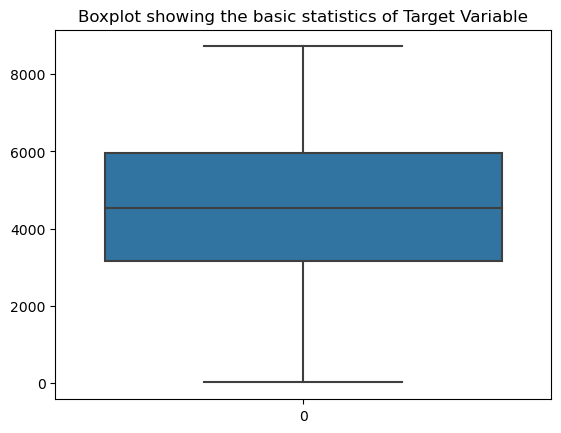

In [20]:
#Understanding the Target variable 'cnt' through boxplot
sns.boxplot(df['cnt'])
plt.title("Boxplot showing the basic statistics of Target Variable")
plt.show()

In [21]:
#The Q1 of target variable is around 3000 and Q3 is around 6000. IQR is 3000 with median 4500.

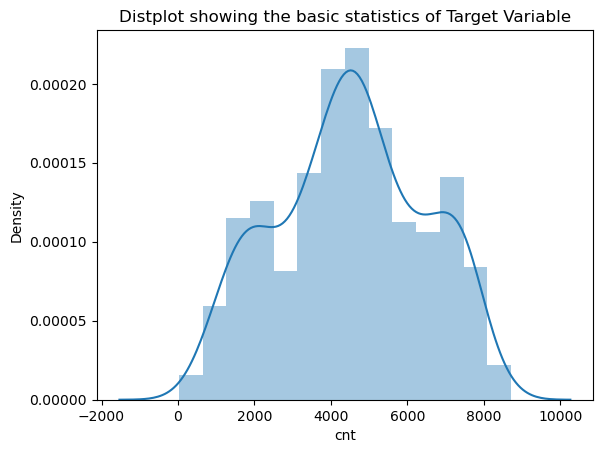

In [22]:
#Understanding the Target variable 'cnt' through distribution plot
sns.distplot(df['cnt'])
plt.title("Distplot showing the basic statistics of Target Variable")
plt.show()

In [23]:
#The target variable follows a normal distribution.

#### (ii) Categorical variables

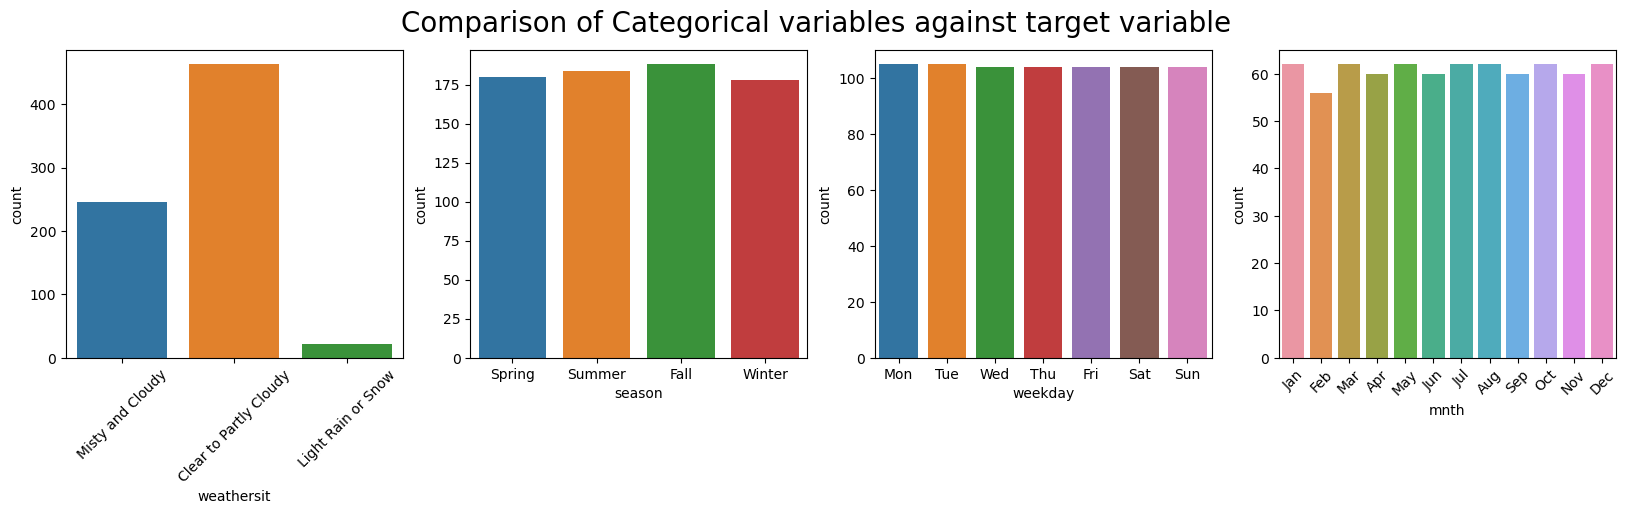

In [24]:
plt.figure(figsize = [20,4])
plt.suptitle('Comparison of Categorical variables against target variable', fontsize=20)
plt.subplot(1,4,1)
sns.countplot(data = df, x = 'weathersit')
plt.xticks(rotation=45)
plt.subplot(1,4,2)
sns.countplot(data = df, x = 'season')
plt.subplot(1,4,3)
sns.countplot(data = df, x = 'weekday')
plt.subplot(1,4,4)
sns.countplot(data = df, x = 'mnth')
plt.xticks(rotation=45)
plt.show()

In [25]:
#When 'weathersit' is Clear to Partly cloudy the bike usage is more.
#The rest of the variables are shows very close values.

### 2. Bivariate Analysis

#### (i) Target Variable and Qualitative Categorical columns

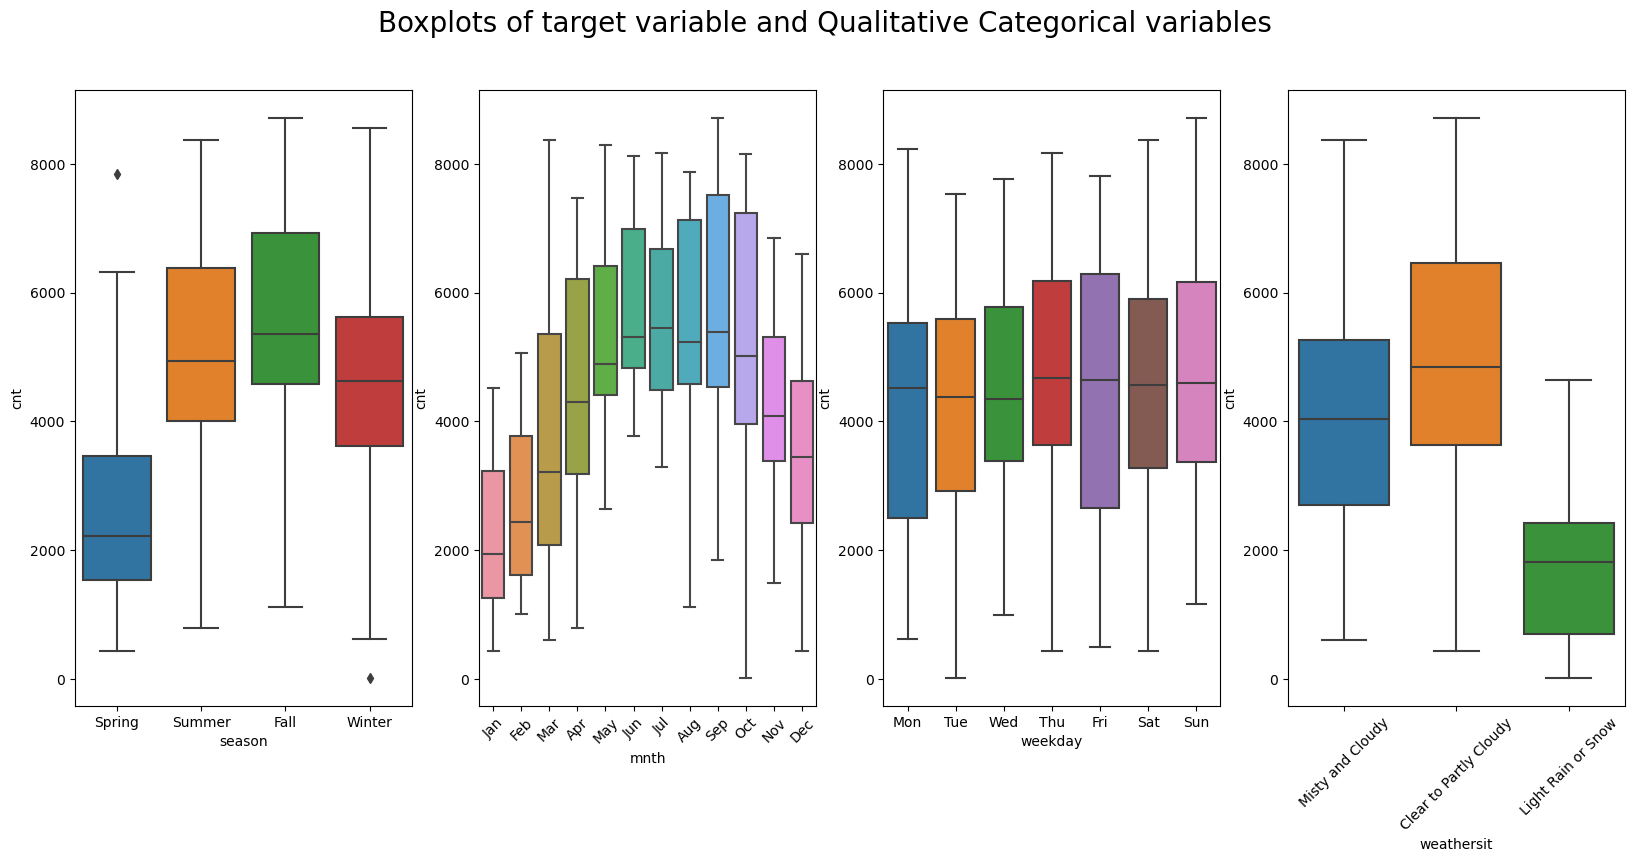

In [26]:
plt.figure(figsize=(20, 8))
plt.suptitle('Boxplots of target variable and Qualitative Categorical variables', fontsize=20)
plt.subplot(1,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xticks(rotation=45)
plt.subplot(1,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(1,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.xticks(rotation=45)
plt.show()

In [27]:
#Considering the seasons, most of the bike booking is in Fall season with a median of over 5000 booking.
#This was followed by Summer & Winter. This indicates, season can be a good predictor for the dependent variable.

#Considering the months, maximum of the bike booking were happening in the months 5,6,7,8,9 and 10 with a median of over 4000 
#booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

#weekday variable shows very close trend having their medians between 4000 to 5000 bookings. 
#This variable can have some or no influence towards the predictor. 

#Considering the weather, most of the bike booking were happening during 'Clear to Partly Cloudy with a median of close to 
#5000 booking. This was followed by 'Misty and Cloudy'. 
#This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

#### (ii) Target Variable and Quantitative Categorical columns

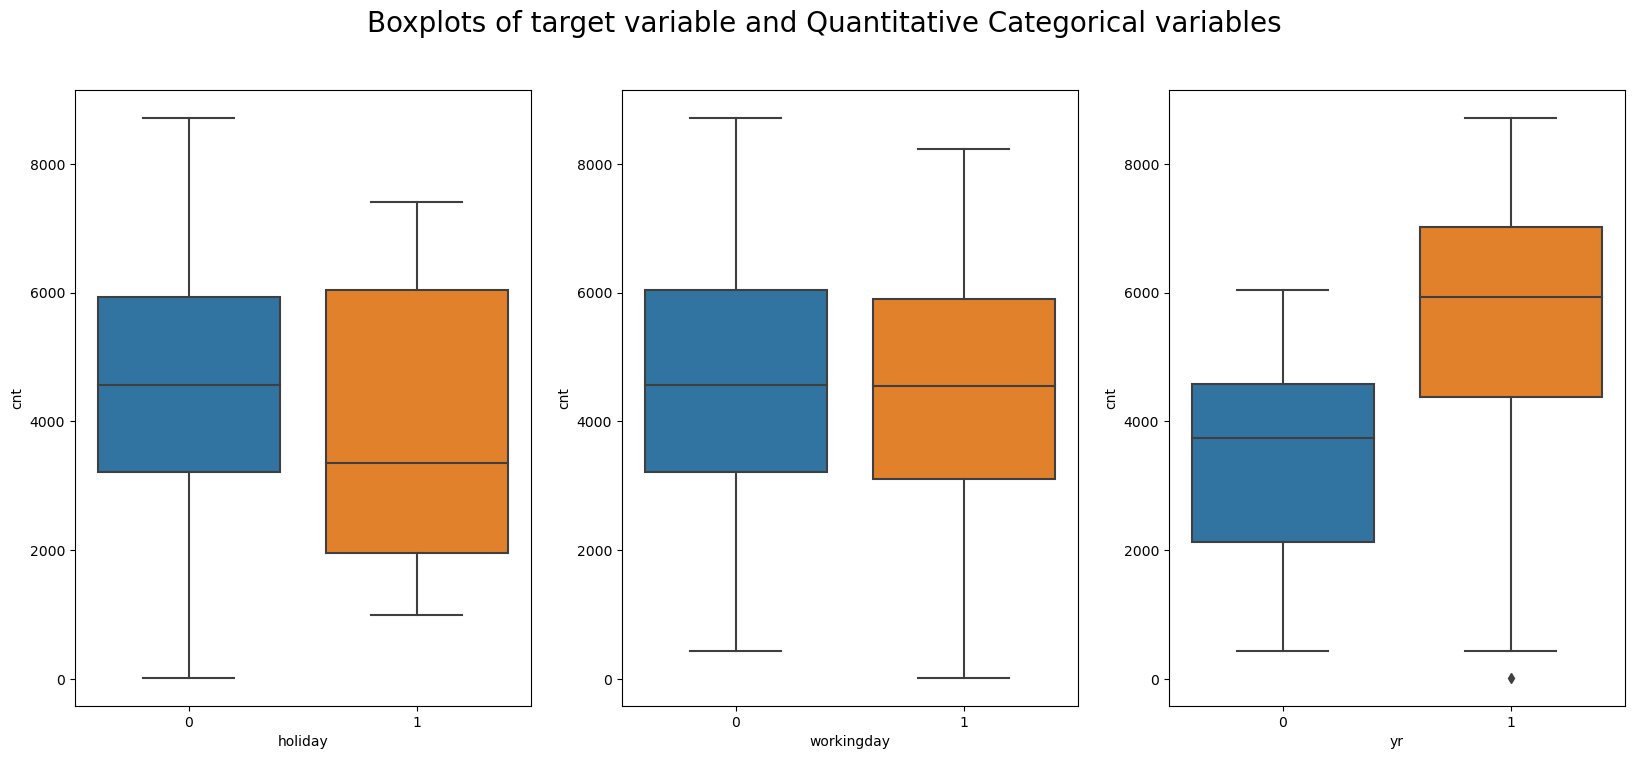

In [28]:
plt.figure(figsize=(20, 8))
plt.suptitle('Boxplots of target variable and Quantitative Categorical variables', fontsize=20)
plt.subplot(1,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [29]:
#There are more users during holidays(0) as compared to Non holidays(1).
#There is a very little discrepancy between users on a working day(1) and non-working day(0).
#There is a increase in number of bike users from year 2018(0) to year 2019(1).

#### (iii) Target Variable and Continuos Independent Variables

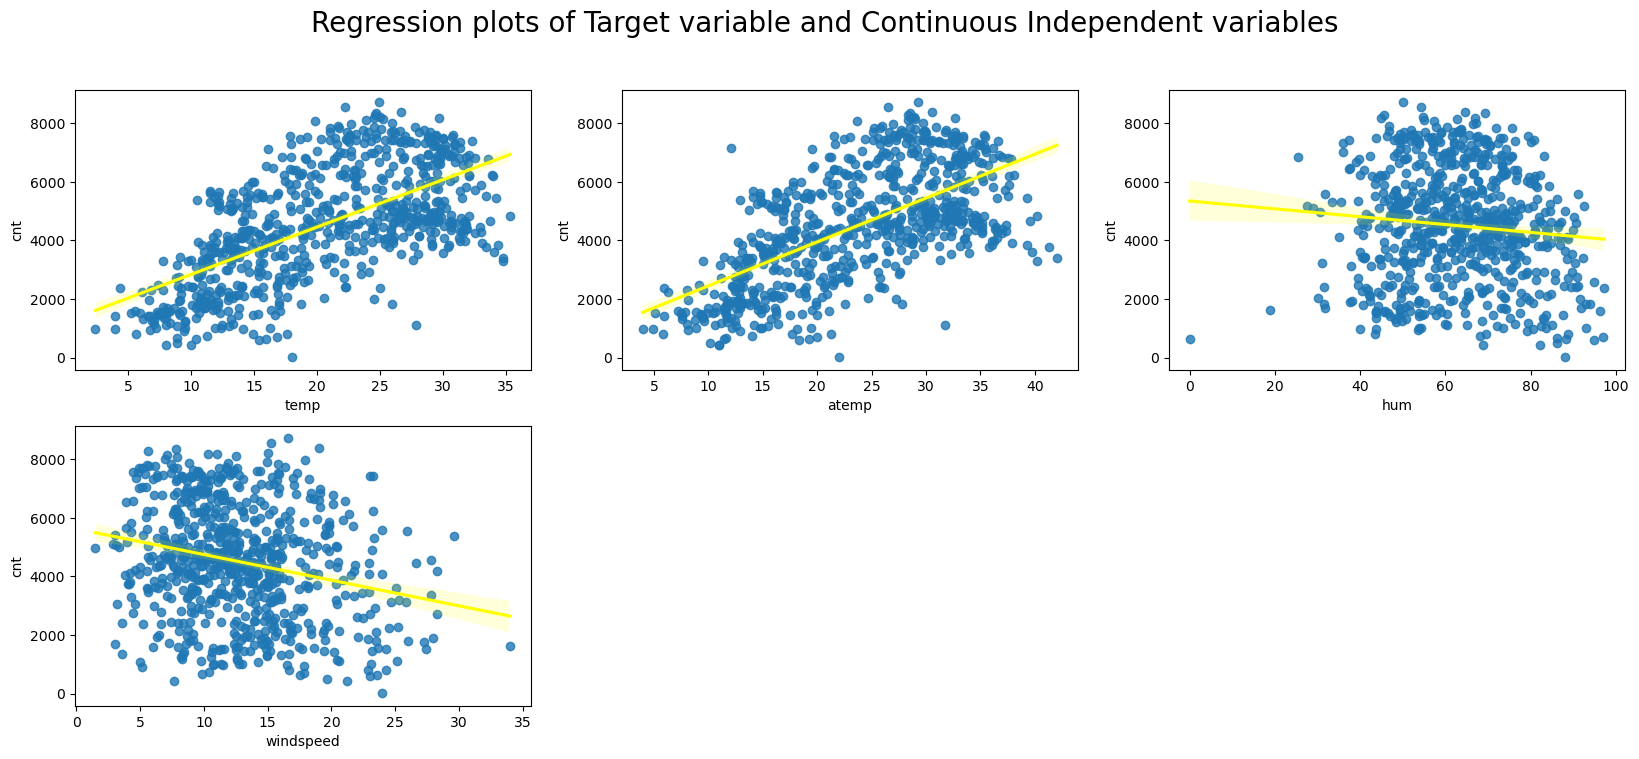

In [30]:
plt.figure(figsize=(20, 8))
plt.suptitle('Regression plots of Target variable and Continuous Independent variables', fontsize=20)
plt.subplot(2,3,1)
sns.regplot(x='temp',y='cnt', data=df, scatter=True, line_kws={'color':'yellow'})
plt.subplot(2,3,2)
sns.regplot(x='atemp',y='cnt', data=df, scatter=True, line_kws={'color':'yellow'})
plt.subplot(2,3,3)
sns.regplot(x='hum',y='cnt', data=df, scatter=True, line_kws={'color':'yellow'})
plt.subplot(2,3,4)
sns.regplot(x='windspeed',y='cnt', data=df, scatter=True, line_kws={'color':'yellow'})
plt.show()

In [31]:
#Bike demand shows a similar and directly proportional relationship with temp and atemp.
#Bike demand shows inverse proportionality with humidity and windspeed.

### 3. Multivariate Analysis

#### (i) Multivariate Analysis using pairplot

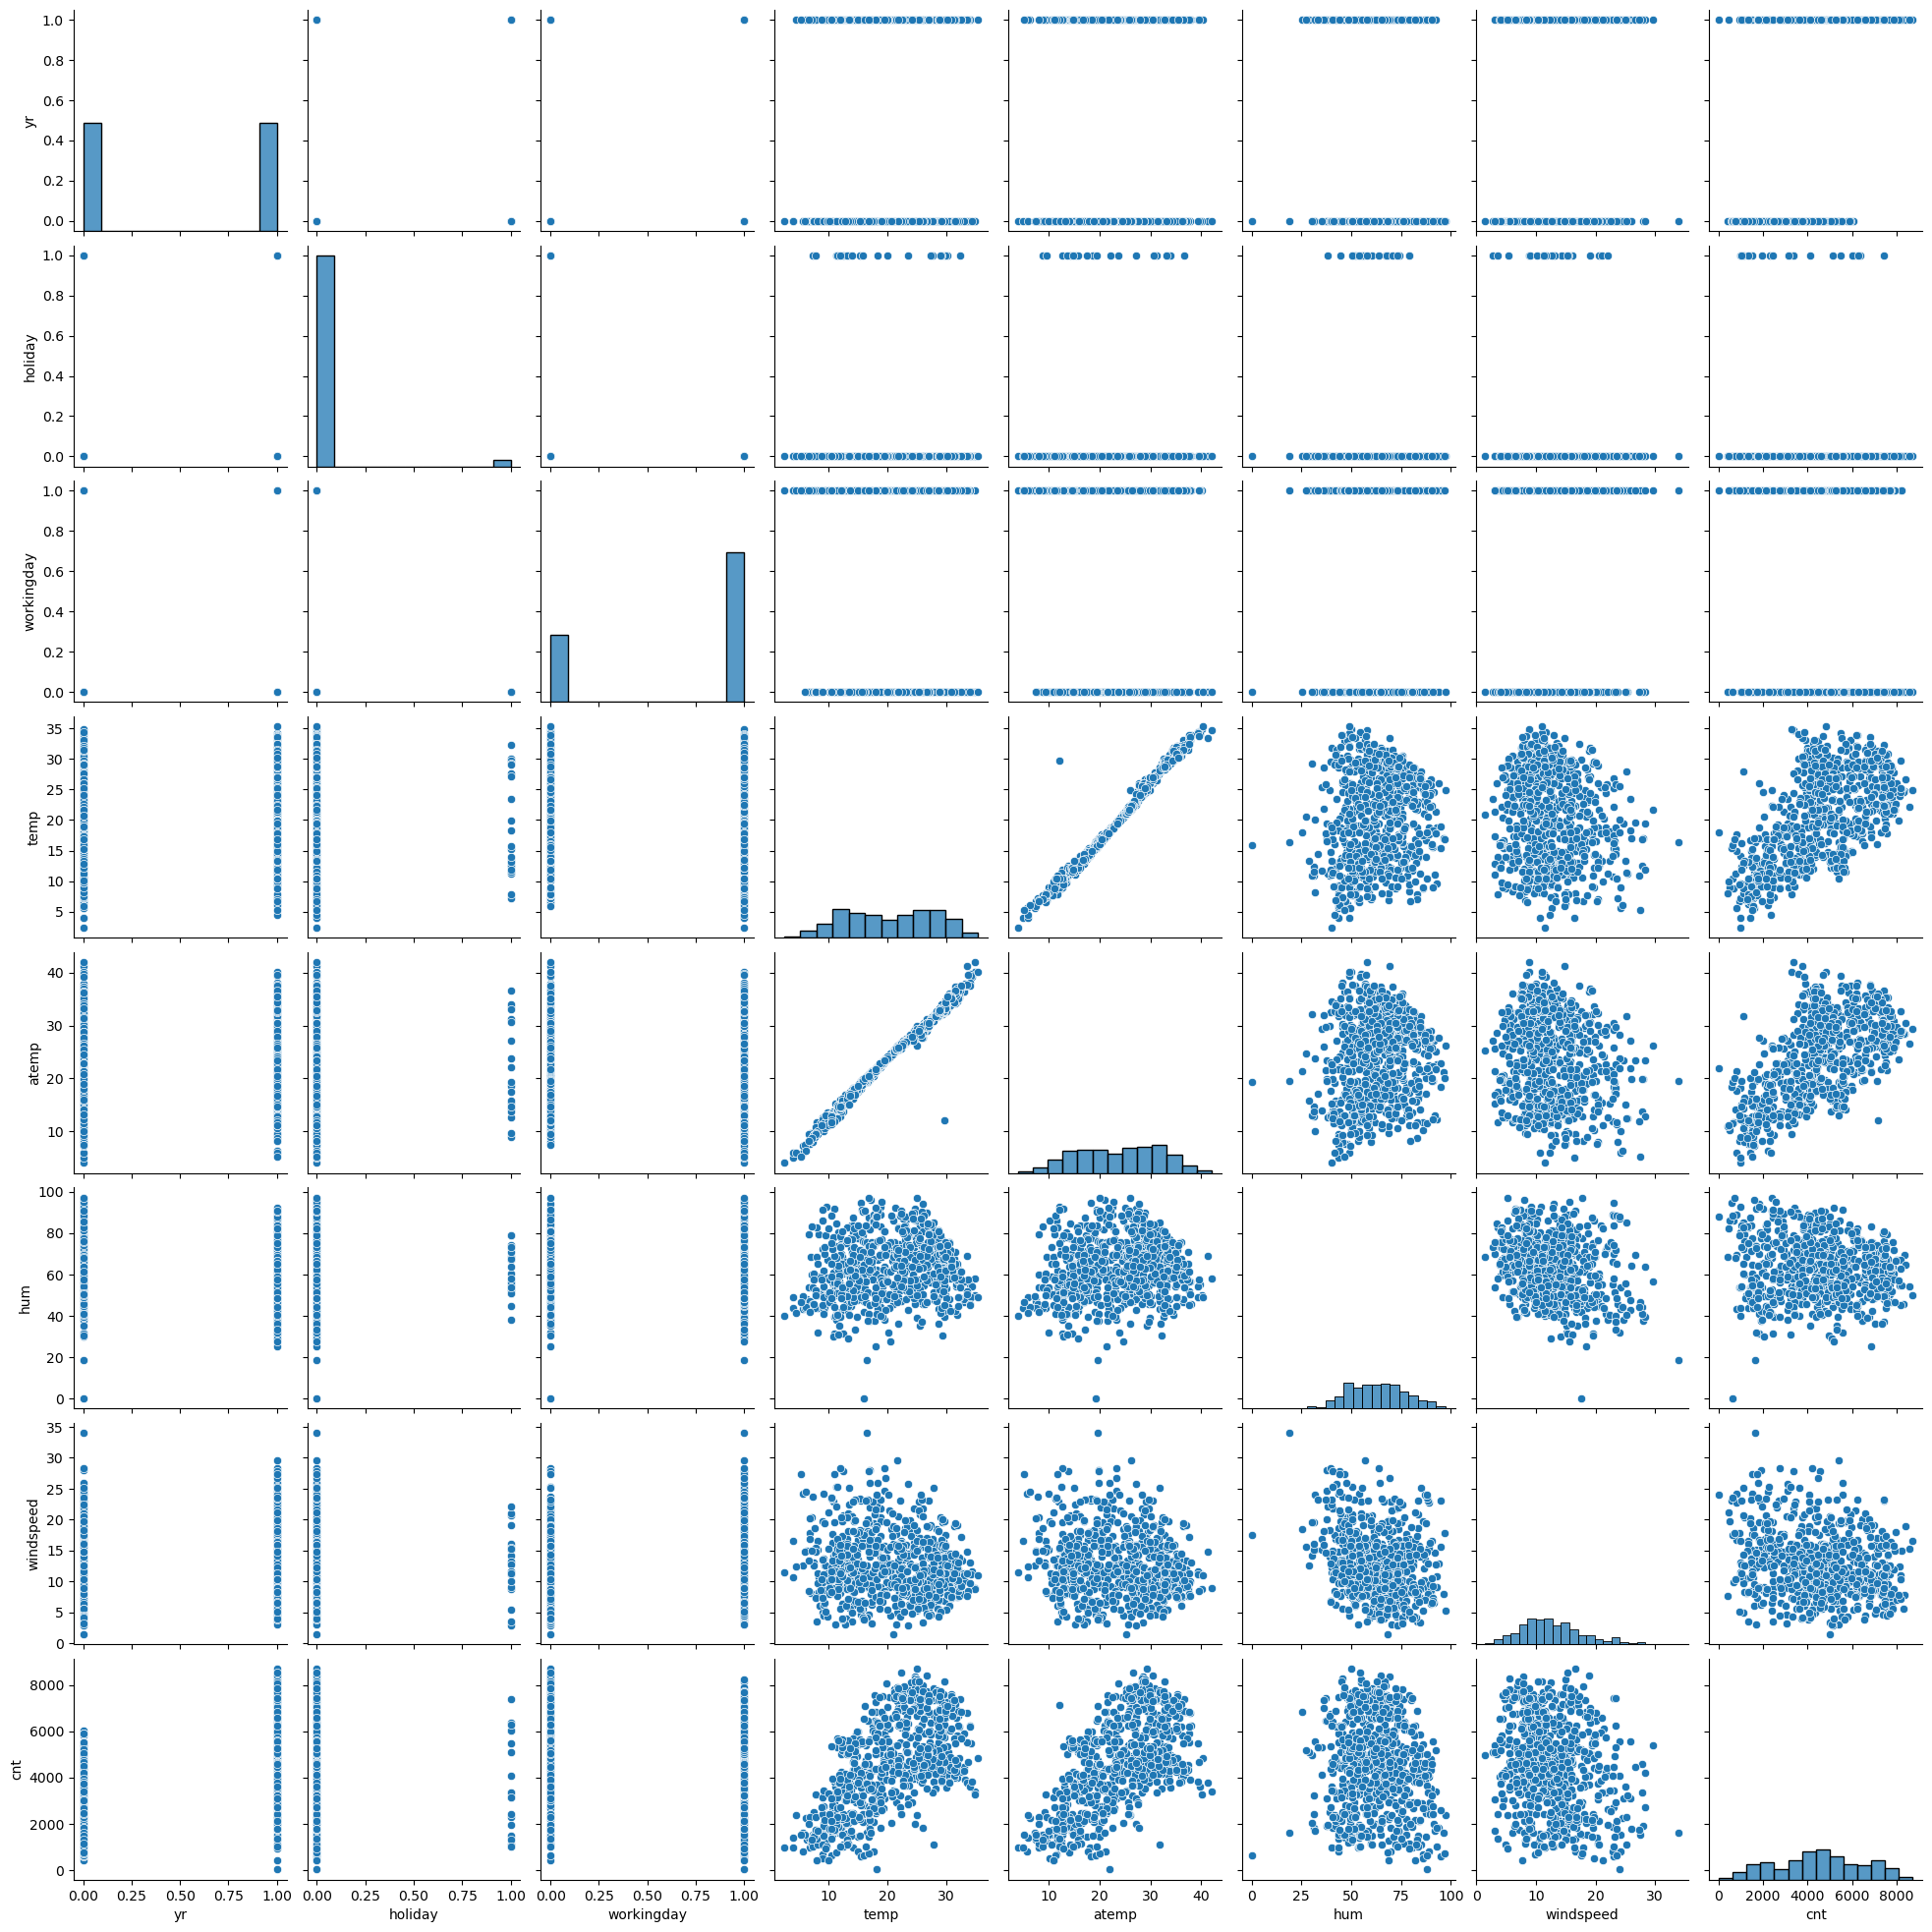

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
#Target variable is directly proportional to temp, atemp and is inversly proportional to humidity and windspeed.

#### (ii) Multivariate Analysis using Correlation heatmap

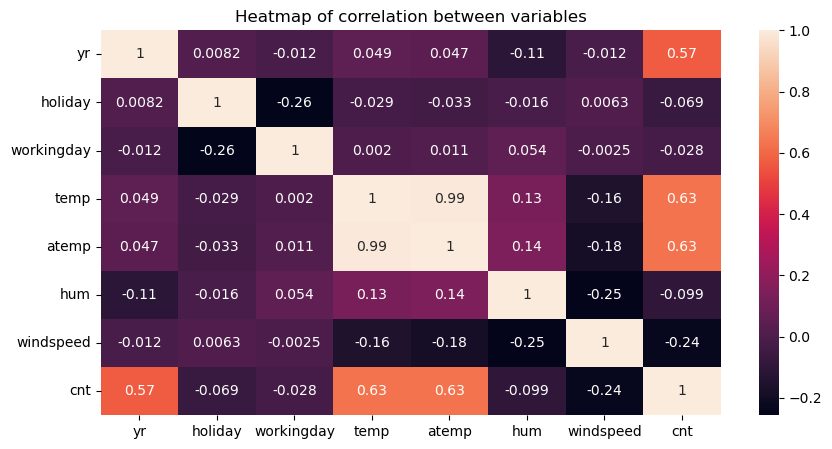

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.title("Heatmap of correlation between variables")
plt.show()

In [35]:
#The heatmap shows which variables are multicollinear in nature, and which variable have high collinearity with the target 
#variable. Here, temp and atemp are multicollinear in nature. Therefore, both of the parameters cannot be used in the model due 
#to multicollinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 4: Data Preparation

In [36]:
#We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
months_df=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [37]:
#Merging  the dataframe with the dummy variable dataset. 
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [38]:
#Dropping the columns 'mnth', 'weekday', 'season' & 'weathersit' as we have already created dummy variables for it.
df_new.drop(['mnth','weekday','season','weathersit'], axis = 1, inplace = True)

In [39]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy,Spring,Summer,Winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
#Check the shape of new dataframe
df_new.shape

(730, 30)

In [41]:
#Check the column info of new dataframe 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   Aug                 730 non-null    int32  
 9   Dec                 730 non-null    int32  
 10  Feb                 730 non-null    int32  
 11  Jan                 730 non-null    int32  
 12  Jul                 730 non-null    int32  
 13  Jun                 730 non-null    int32  
 14  Mar                 730 non-null    int32  
 15  May                 730 non-null    int32  
 16  Nov     

## Step 5: Splitting the data to Train and Test

In [42]:
#Splitting the data into Train and Test (70:30 ratio) using train_test_split method from sklearn package
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.30, random_state = 100)

In [43]:
#Checking the shape of training datatset
df_train.shape

(510, 30)

In [44]:
#Checking the columns of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   holiday             510 non-null    int64  
 2   workingday          510 non-null    int64  
 3   temp                510 non-null    float64
 4   atemp               510 non-null    float64
 5   hum                 510 non-null    float64
 6   windspeed           510 non-null    float64
 7   cnt                 510 non-null    int64  
 8   Aug                 510 non-null    int32  
 9   Dec                 510 non-null    int32  
 10  Feb                 510 non-null    int32  
 11  Jan                 510 non-null    int32  
 12  Jul                 510 non-null    int32  
 13  Jun                 510 non-null    int32  
 14  Mar                 510 non-null    int32  
 15  May                 510 non-null    int32  
 16  Nov         

In [45]:
#Checking the shape of testing datatset
df_test.shape

(219, 30)

In [46]:
#Checking the columns of testing dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  219 non-null    int64  
 1   holiday             219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   atemp               219 non-null    float64
 5   hum                 219 non-null    float64
 6   windspeed           219 non-null    float64
 7   cnt                 219 non-null    int64  
 8   Aug                 219 non-null    int32  
 9   Dec                 219 non-null    int32  
 10  Feb                 219 non-null    int32  
 11  Jan                 219 non-null    int32  
 12  Jul                 219 non-null    int32  
 13  Jun                 219 non-null    int32  
 14  Mar                 219 non-null    int32  
 15  May                 219 non-null    int32  
 16  Nov         

## Step 6: Re-scaling of Data

In [47]:
# Using MinMaxScaler to Rescale the features
scaler = MinMaxScaler()

In [48]:
#Checking the columns in training dataset
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Rain or Snow', 'Misty and Cloudy', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [49]:
#Applying scaler to numerical columns- 'temp','atemp','hum','windspeed','cnt'
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
#Verifying the head after scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy,Spring,Summer,Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [51]:
#Description of the dataset
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


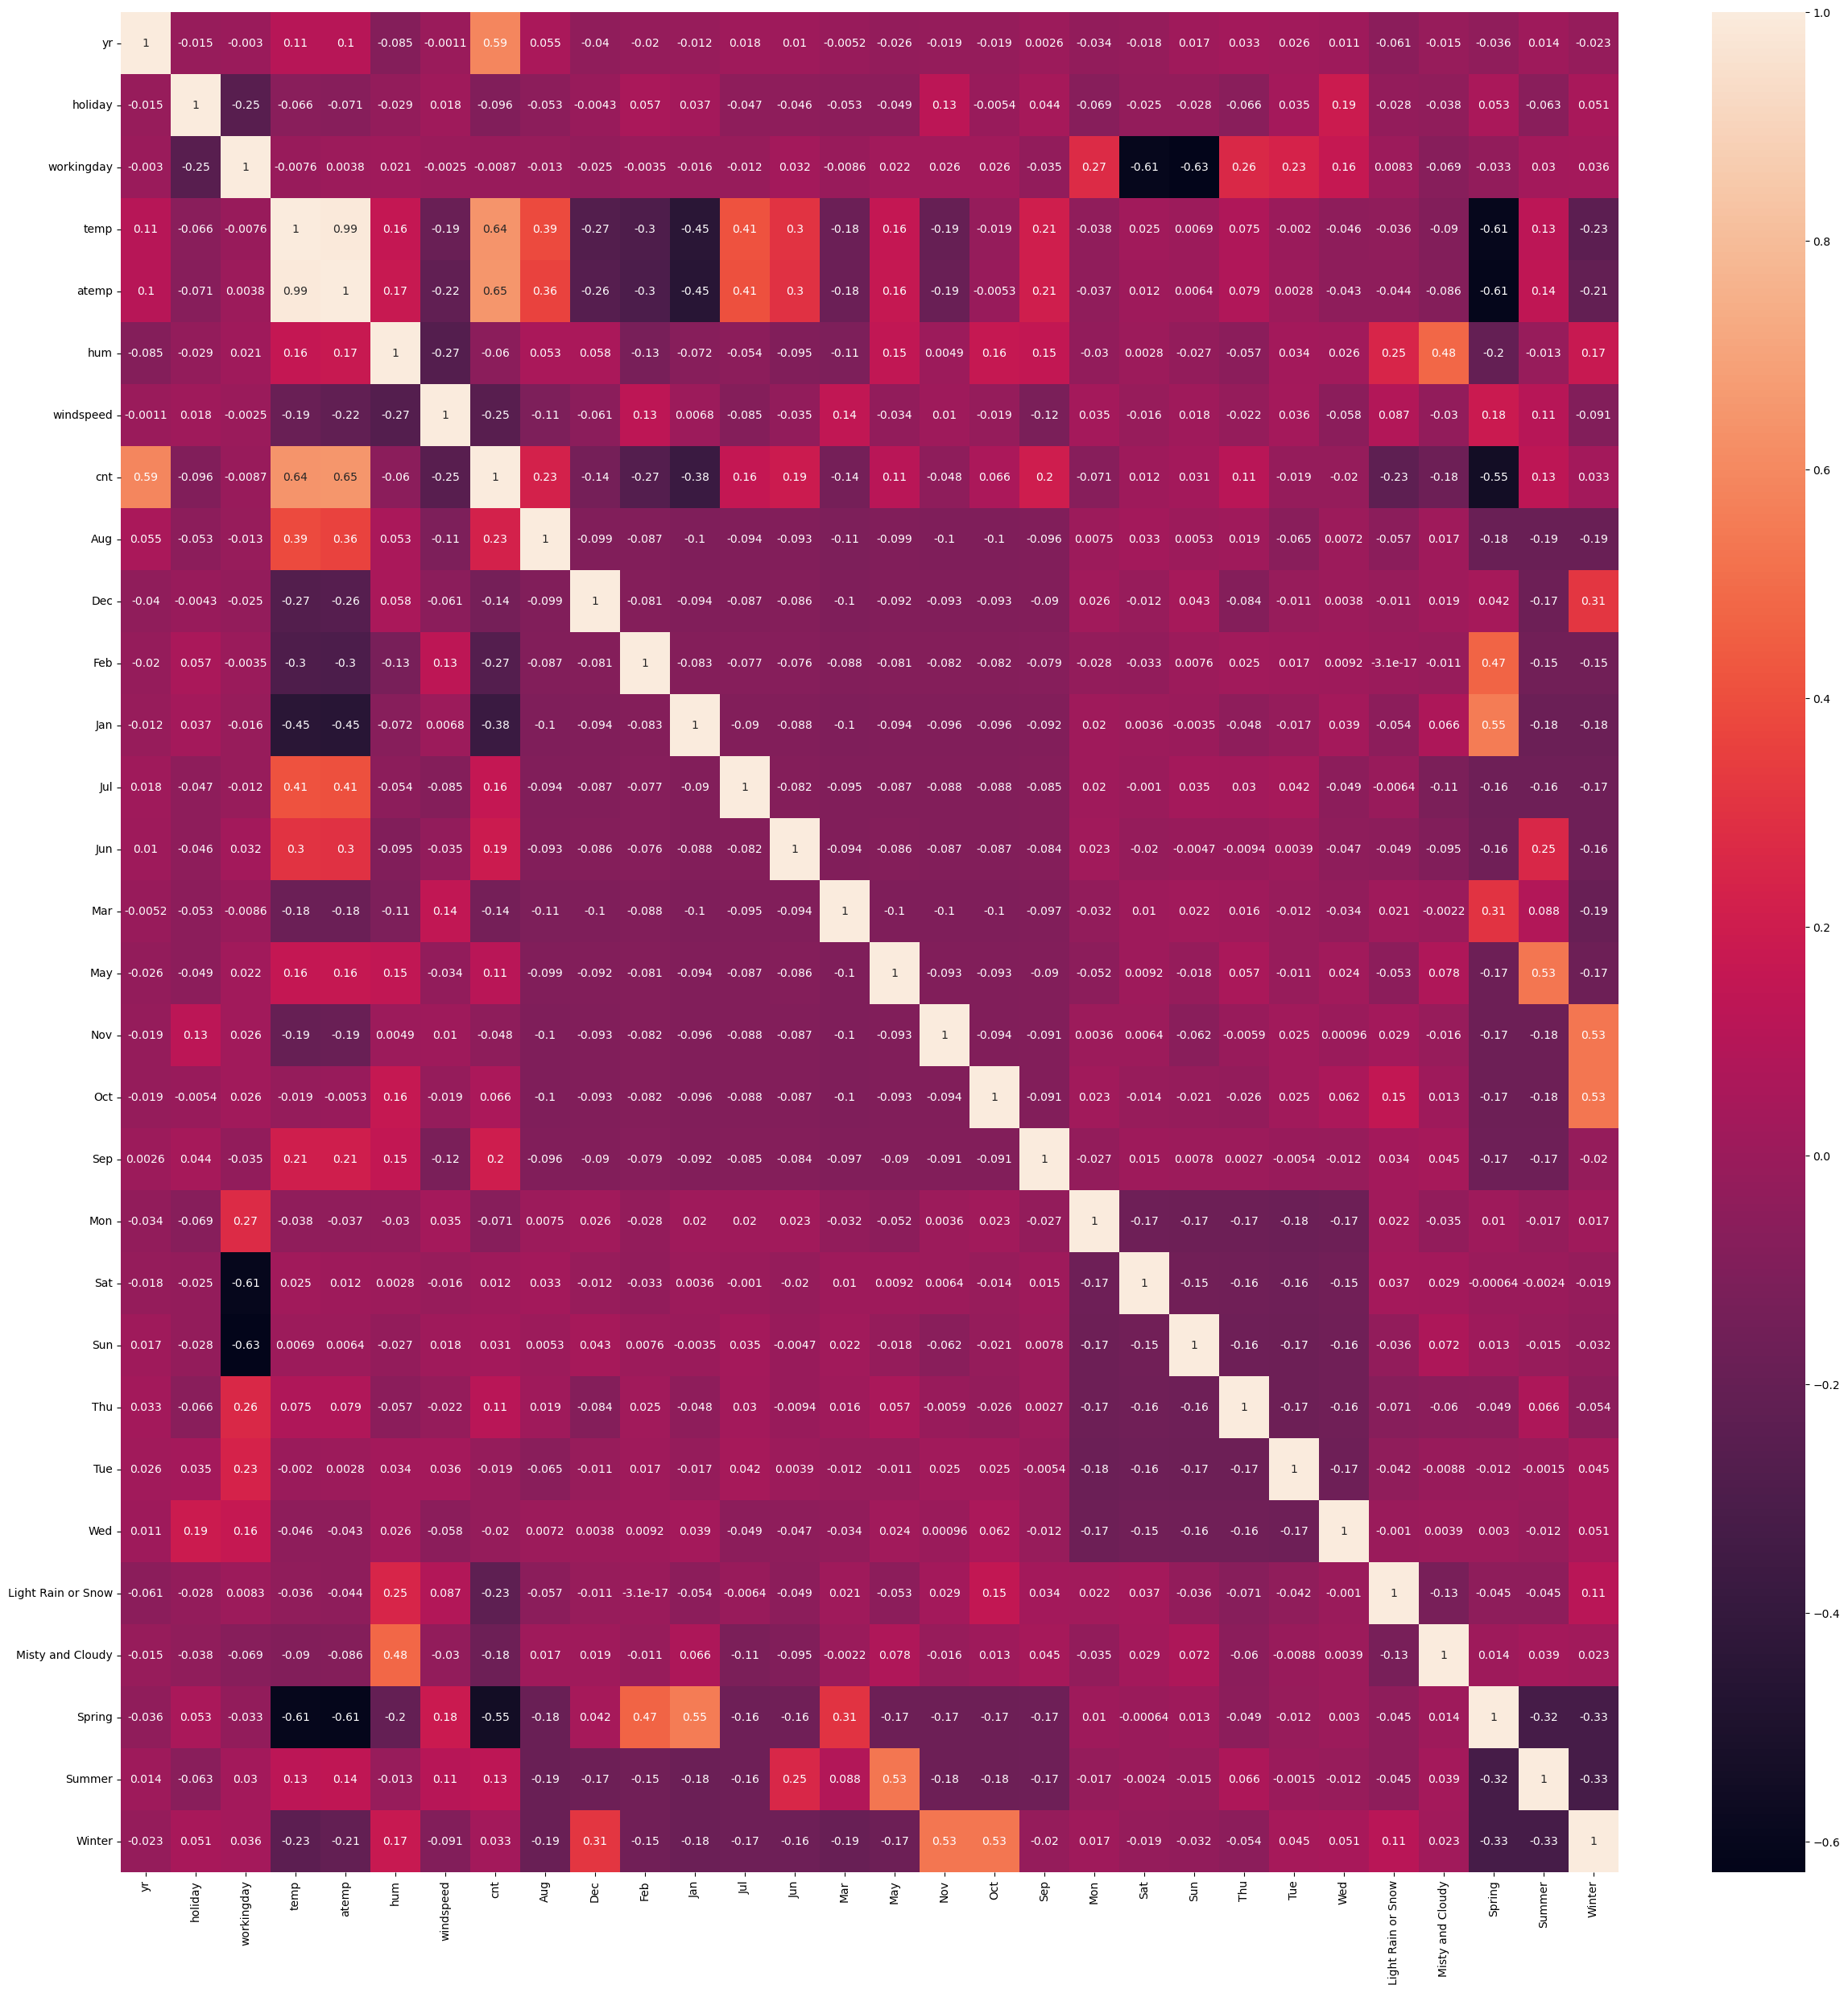

In [52]:
#Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [53]:
#Here, some of the positively correlated variables are:
##cnt & yr
##cnt & temp
##Misty & humidity 
##Spring & Jan
##Spring & Feb
##Summer & May
##Winter & Oct
##Winter & Nov

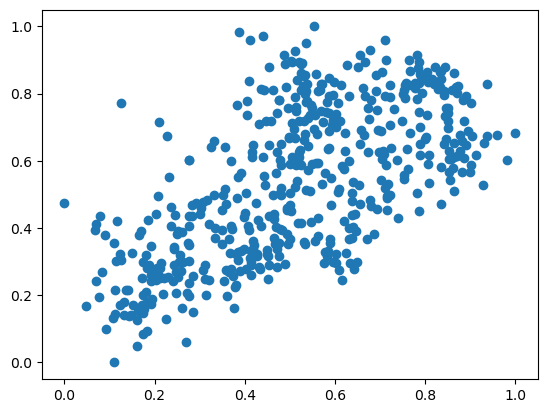

In [54]:
#Just to verify the above, let's see a scatterplot for cnt vs temp
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

In [55]:
#The above visualization confirms the positive correlation between temp and cnt.

## Step 7: Feature Selection & Modelling

### Using a Hybrid approach - Automated and Manual

In [56]:
#RFE is used first for automated model selection. Further, manual approach will be used to drop variables based on the results.

In [57]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [58]:
y_train.shape

(510,)

In [59]:
X_train.shape

(510, 29)

In [60]:
#Data has been properly split with 510 rows each

#### RFE/Recursive Feature Elimination: 
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [61]:
#RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [62]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Rain or Snow', True, 1),
 ('Misty and Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [63]:
#Selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'Light Rain or Snow', 'Misty and Cloudy', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [64]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model: Model 1

In [65]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,Spring,4.37
14,Winter,4.06
13,Summer,2.81
11,Misty and Cloudy,2.32
0,yr,2.09
8,Nov,1.83
6,Jan,1.75


In [66]:
#Humidity shows high VIF value.

In [67]:
#Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [68]:
#Check the parameters obtained
lr_1.params

const                 0.320243
yr                    0.230328
holiday              -0.091228
temp                  0.479977
hum                  -0.160227
windspeed            -0.188457
Dec                  -0.037199
Jan                  -0.043748
Jul                  -0.055495
Nov                  -0.040949
Sep                   0.074891
Light Rain or Snow   -0.248116
Misty and Cloudy     -0.055876
Spring               -0.061737
Summer                0.040767
Winter                0.103435
dtype: float64

In [69]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        22:36:40   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3202      0

In [70]:
#Humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [71]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,Winter,2.94
11,Spring,2.89
12,Summer,2.23
0,yr,2.07
7,Nov,1.80
5,Jan,1.66
6,Jul,1.59
10,Misty and Cloudy,1.56


In [72]:
#VIF value of temp is higher than 5 but we can't drop 'temp' because temperature can be an important factor for a business 
#like that of bike rentals and dropping it will affect the r2 value.

### Model 2

In [73]:
#Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [74]:
#Check the parameters obtained
lr_2.params

const                 0.246635
yr                    0.234287
holiday              -0.091915
temp                  0.437655
windspeed            -0.158596
Dec                  -0.044529
Jan                  -0.050270
Jul                  -0.050376
Nov                  -0.041852
Sep                   0.068219
Light Rain or Snow   -0.292892
Misty and Cloudy     -0.081442
Spring               -0.071640
Summer                0.033271
Winter                0.088652
dtype: float64

In [75]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.57e-186
Time:                        22:36:40   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2466      0

In [76]:
#Summer shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Summer'], axis = 1)

In [77]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
12,Winter,2.54
11,Spring,2.36
0,yr,2.06
7,Nov,1.80
5,Jan,1.65
10,Misty and Cloudy,1.53
4,Dec,1.46
6,Jul,1.36


In [78]:
#VIF values seems to be good now

### Model 3

In [79]:
#Building 3nd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [80]:
#Check the parameters obtained
lr_3.params

const                 0.289327
yr                    0.234795
holiday              -0.091280
temp                  0.402583
windspeed            -0.154010
Dec                  -0.050984
Jan                  -0.055626
Jul                  -0.064343
Nov                  -0.048827
Sep                   0.053670
Light Rain or Snow   -0.294885
Misty and Cloudy     -0.081190
Spring               -0.103373
Winter                0.064977
dtype: float64

In [81]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.08e-186
Time:                        22:36:40   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2893      0

In [82]:
#Nov shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Nov'], axis = 1)

In [83]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
10,Spring,2.36
0,yr,2.06
5,Jan,1.64
11,Winter,1.64
9,Misty and Cloudy,1.53
6,Jul,1.36
4,Dec,1.29
7,Sep,1.20


In [84]:
#VIF values seems to be good now

### Model 4

In [85]:
#Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()

In [86]:
#Check the parameters obtained
lr_4.params

const                 0.276909
yr                    0.234754
holiday              -0.099395
temp                  0.419961
windspeed            -0.154174
Dec                  -0.033983
Jan                  -0.050552
Jul                  -0.067096
Sep                   0.057528
Light Rain or Snow   -0.290427
Misty and Cloudy     -0.080239
Spring               -0.099725
Winter                0.048206
dtype: float64

In [87]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.02e-186
Time:                        22:36:40   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2769      0

In [88]:
#Dec shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Dec'], axis = 1)

In [89]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
9,Spring,2.25
0,yr,2.06
4,Jan,1.60
8,Misty and Cloudy,1.53
10,Winter,1.40
5,Jul,1.36
6,Sep,1.20
7,Light Rain or Snow,1.08


In [90]:
#VIF values seems to be good now

### Model 5

In [91]:
#Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()

In [92]:
#Check the parameters obtained
lr_5.params

const                 0.265709
yr                    0.234848
holiday              -0.097732
temp                  0.433461
windspeed            -0.148246
Jan                  -0.042689
Jul                  -0.069264
Sep                   0.058652
Light Rain or Snow   -0.287686
Misty and Cloudy     -0.080173
Spring               -0.101338
Winter                0.043231
dtype: float64

In [93]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.13e-186
Time:                        22:36:41   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2657      0

In [94]:
#Jan shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Jan'], axis = 1)

In [95]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
8,Spring,1.65
7,Misty and Cloudy,1.51
9,Winter,1.40
4,Jul,1.35
5,Sep,1.20
6,Light Rain or Snow,1.08
1,holiday,1.04


In [96]:
#VIF values seems to be good now

### Model 6

In [97]:
#Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()

In [98]:
#Check the parameters obtained
lr_6.params

const                 0.251899
yr                    0.234092
holiday              -0.098556
temp                  0.451455
windspeed            -0.139817
Jul                  -0.072719
Sep                   0.057705
Light Rain or Snow   -0.286408
Misty and Cloudy     -0.081133
Spring               -0.110795
Winter                0.047278
dtype: float64

In [99]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.16e-186
Time:                        22:36:41   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2519      0

In [100]:
#Final check on VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
8,Spring,1.65
7,Misty and Cloudy,1.51
9,Winter,1.40
4,Jul,1.35
5,Sep,1.20
6,Light Rain or Snow,1.08
1,holiday,1.04


In [101]:
#All VIF values are under 5, showing multicollinearity of variables.

In [102]:
#Model 6 seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be 
#significant. F-Statistics value of 248.7 and the p-value of 1.16e-186 i.e almost equals to zero, states that the overall model
#is significant.

## Step 8: Residual Analysis of the train data and validation

In [103]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,Jul,Sep,Light Rain or Snow,Misty and Cloudy,Spring,Winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [104]:
y_train_pred = lr_6.predict(X_train_lm_6)

### Normality of error terms

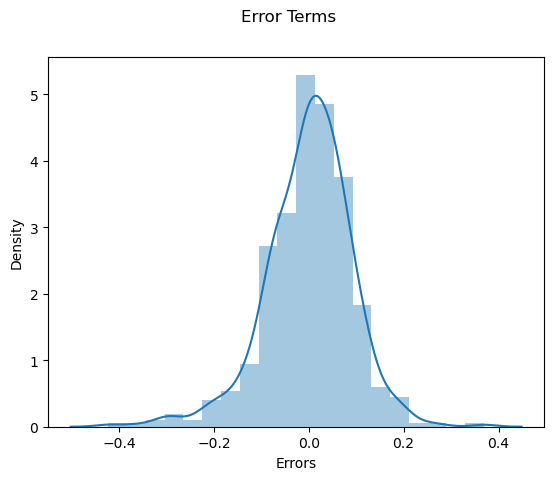

In [105]:
#Plotting the histogram of the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.suptitle('Error Terms') 
plt.xlabel('Errors')
plt.show()

In [106]:
#Error terms are following normal distribution

### Linearity

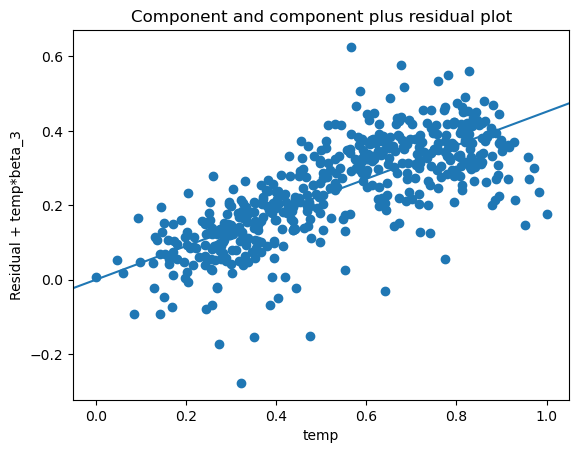

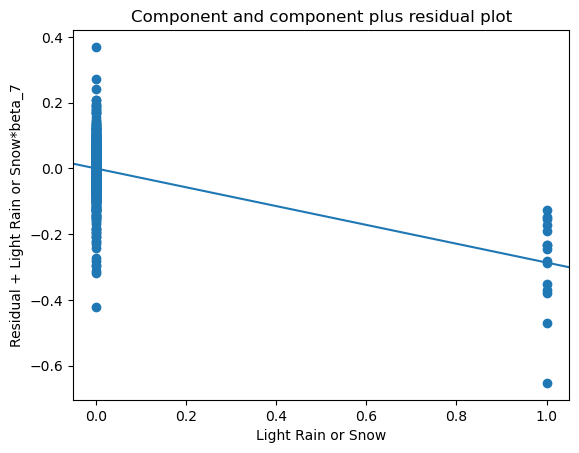

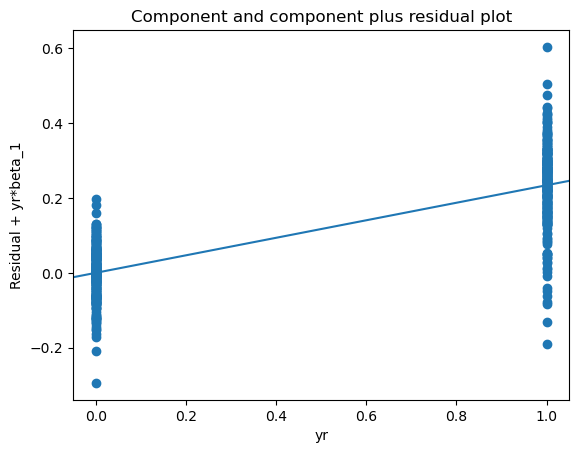

In [107]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Light Rain or Snow')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'yr')
plt.show()

In [108]:
#Linearity can be observed from above visualizations

### Checking Multicolinearity

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
8,Spring,1.65
7,Misty and Cloudy,1.51
9,Winter,1.40
4,Jul,1.35
5,Sep,1.20
6,Light Rain or Snow,1.08
1,holiday,1.04


In [110]:
#Multicollinearity is present when the VIF is higher than 5 and since VIF values are less than 5, it validates multicollinearity.

In [112]:
#Homescedasticity

In [113]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

NameError: name 'y_test' is not defined

<Figure size 640x480 with 0 Axes>

### Correlation of Error terms

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

In [ ]:
#Again, VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Step 9: Making Predictions Using the Final Model

In [ ]:
#Now that we have fitted the model and checked the normality of error terms, let's make predictions using the final model.

In [ ]:
#Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [ ]:
y_pred = lr_6.predict(X_test_lm_6)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

## Step 10: Model Evaluation

In [ ]:
#Let's now plot the graph for actual versus predicted values.

In [ ]:
#Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
round(lr_6.params,4)

In [ ]:
#Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [ ]:
#Visualizing the fit on the test data through plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Comparision between Training and Testing dataset:

# FINAL REPORT